In [24]:
import pandas as pd
import time
import re
import numpy as np

In [25]:
refugee_df = pd.read_csv('unhcr-persons-of-concern-origin-syr-csv-1.csv')
refugee_df = refugee_df.sort_values('Year', ascending=True)
refugee_df = refugee_df.reset_index()
refugee_df = refugee_df.drop(refugee_df.index[0])
refugee_df = refugee_df.drop(['index'], axis=1)
refugee_df

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
1,1968,Lebanon,Syrian Arab Rep.,1200,NaN,NaN,NaN,NaN,NaN,NaN,1200
2,1969,Lebanon,Syrian Arab Rep.,1200,NaN,NaN,NaN,NaN,NaN,NaN,1200
3,1979,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
4,1980,Italy,Syrian Arab Rep.,2,NaN,NaN,NaN,NaN,NaN,NaN,2
5,1980,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
6,1981,Italy,Syrian Arab Rep.,4,NaN,NaN,NaN,NaN,NaN,NaN,4
7,1981,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
8,1982,Italy,Syrian Arab Rep.,4,NaN,NaN,NaN,NaN,NaN,NaN,4
9,1982,Lebanon,Syrian Arab Rep.,500,NaN,6000,NaN,NaN,NaN,NaN,6500
10,1983,Lebanon,Syrian Arab Rep.,520,NaN,NaN,NaN,NaN,NaN,NaN,520


In [26]:
# select the years we want
years = ['2011', '2012', '2013', '2014', '2015','2016', '2017']

refugee_subset = refugee_df[refugee_df['Year'].isin(years)]
# reset index
refugee_subset = refugee_subset.reset_index()
# drop index column
bad_cols = ['index','Origin','Returned refugees','Returned refugees',
            'Internally displaced persons (IDPs)','Returned IDPs',
            'Stateless persons','Others of concern']
refugee_subset = refugee_subset.drop(bad_cols, axis=1)
#refugee_subset

In [27]:
refugee_subset.to_csv('clean_refugee_data.csv',index=False, header=True)

## Replace following Country Names

Venezuela (Bolivarian Republic of) -> Venezuela
Czech Rep. -> Czech Republic
Iran (Islamic Rep. of) -> Iran
The former Yugoslav Republic of Macedonia -> Macedonia
Bolivia (Plurinational State of) -> Bolivia
Dominican Rep. -> Dominican Republic
Rep. of Korea -> "Korea, South"
United Rep. of Tanzania -> Tanzania
China, Hong Kong SAR -> Hong Kong
South Sudan -> Sudan
Dem. Rep. of the Congo -> "Congo, Democratic Republic of the"
Central African Rep. -> Central African Republic
United States of America -> United States
Sint Maarten (Dutch part) -> Sint Maarten
Serbia and Kosovo (S/RES/1244 (1999)) -> Serbia
Rep. of Moldova -> Moldova
Syrian Arab Rep. -> Syria

In [28]:
# Grab country codes in order to use it with Plotly
countries_df = pd.read_csv('plotly_countries_and_codes.csv')
#countries_df

In [29]:
# Import csv with lat/long of each country
locations_df = pd.read_csv('countries.csv')
# locations_df

In [30]:
# replace names in refugee_subse dataframe
new_refugee_df = refugee_subset.replace({
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'Czech Rep.':'Czech Republic',
    'Iran (Islamic Rep. of)':'Iran',
    'The former Yugoslav Republic of Macedonia':'Macedonia',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Dominican Rep.':'Dominican Republic',
    'Rep. of Korea': 'Korea, South',
    'United Rep. of Tanzania':'Tanzania',
    'China, Hong Kong SAR':'Hong Kong',
    'South Sudan':'Sudan',
    'Dem. Rep. of the Congo':'Congo, Democratic Republic of the',
    'Central African Rep.':'Central African Republic',
    'United States of America':'United States',
    'Sint Maarten (Dutch part)':'Sint Maarten',
    'Serbia and Kosovo (S/RES/1244 (1999))':'Serbia',
    'Rep. of Moldova':'Moldova',
    'Syrian Arab Rep.':'Syria',   
})
#new_refugee_df

In [31]:
# joining the two tables together
merged_df = new_refugee_df.set_index('Country / territory of asylum/residence').join(countries_df.set_index('COUNTRY'))

# reset row index
merged_df = merged_df.reset_index()

# remove GDP column
merged_df = merged_df.drop(['GDP (BILLIONS)'], axis=1)

# rename index column to 'Country'
merged_df.rename(columns={'index':'Country'}, inplace=True)

# rearrange columns
merged_df = merged_df[['CODE','Country','Year',
                       'Refugees (incl. refugee-like situations)',
                       'Asylum-seekers (pending cases)',
                       'Total Population']]

## Clean * and NaN values

In [32]:
refugee_subset = refugee_df[refugee_df['Year'].isin(years)]
# Fill NaN values with 0
merged_df['Refugees (incl. refugee-like situations)'] = merged_df['Refugees (incl. refugee-like situations)'].fillna(0)
# remove * and convert values to int values
merged_df['Refugees (incl. refugee-like situations)'] = merged_df['Refugees (incl. refugee-like situations)'].apply(lambda x : 0 if x == '*' else int(x))

In [33]:
# Fill NaN values with 0
merged_df['Asylum-seekers (pending cases)'] = merged_df['Asylum-seekers (pending cases)'].fillna(0)
# remove * and convert values to int values
merged_df['Asylum-seekers (pending cases)'] = merged_df['Asylum-seekers (pending cases)'].apply(lambda x : 0 if x == '*' else int(x))

In [34]:
# Fill NaN values with 0
merged_df['Total Population'] = merged_df['Total Population'].fillna(0)
# remove * and convert values to int values
merged_df['Total Population'] = merged_df['Total Population'].apply(lambda x : 0 if x == '*' else int(x))
merged_df


,CODE,Country,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population
0,AFG,Afghanistan,2012,1,0,1
1,ALB,Albania,2012,0,3,3
2,ALB,Albania,2013,0,15,15
3,ALB,Albania,2014,3,8,11
4,ALB,Albania,2015,3,0,3
5,ALB,Albania,2016,3,0,3
6,ALB,Albania,2017,0,22,25
7,DZA,Algeria,2011,0,4,4
8,DZA,Algeria,2012,0,236,236
9,DZA,Algeria,2013,0,1080,1080


## Plotly

In [35]:
import plotly
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
plotly.__version__

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='ksuhr1', api_key='vqABl115Eby9TTvwqidd')

In [36]:
# find the total, just for reference/filler; not to be used in the final visualization
# new_total_df = merged_df.groupby(['Country', 'CODE']).sum()
# new_total_df = new_total_df.reset_index()
#new_total_df

In [37]:
# remove rows where refugees == 0
#new_total_df = new_total_df[new_total_df['Refugees (incl. refugee-like situations)'] != 0]

new_total_df = merged_df[merged_df['Refugees (incl. refugee-like situations)'] != 0]

In [38]:
# Add longitude and latitude values
all_code_df = new_total_df.set_index('Country').join(locations_df.set_index('name'))
all_code_df = all_code_df.reset_index()
all_code_df = all_code_df.drop(['country'], axis=1)
all_code_df.rename(columns={'index':'Country'}, inplace=True)

all_code_df
#all_code_df.to_csv('clean_refugee_data.csv',index=False, header=True)


,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Afghanistan,AFG,2012,1,0,1,33.939110,67.709953
1,Albania,ALB,2014,3,8,11,41.153332,20.168331
2,Albania,ALB,2015,3,0,3,41.153332,20.168331
3,Albania,ALB,2016,3,0,3,41.153332,20.168331
4,Algeria,DZA,2017,8,5821,5829,28.033886,1.659626
5,Anguilla,AIA,2015,1,0,1,18.220554,-63.068615
6,Anguilla,AIA,2016,1,0,1,18.220554,-63.068615
7,Antigua and Barbuda,ATG,2015,15,0,15,17.060816,-61.796428
8,Antigua and Barbuda,ATG,2016,4,0,4,17.060816,-61.796428
9,Argentina,ARG,2012,40,9,49,-38.416097,-63.616672


In [39]:
# # add coordinates for South Korea 
all_code_df.at[71, 'latitude'] = 35.9078
all_code_df.at[71, 'longitude'] = 127.7669

# Macdeonia
all_code_df.at[81, 'latitude'] = 41.6086
all_code_df.at[81, 'longitude'] = 21.7453

# Sint Maarten
all_code_df.at[114,'latitude'] = 18.0347
all_code_df.at[114,'longitude'] = -63.0681

# Congo
all_code_df.at[31,'latitude'] = -4.038333
all_code_df.at[31,'longitude'] = 21.758664
#all_code_df.to_csv('clean_refugee_data.csv',index=False, header=True)
all_code_df

,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Afghanistan,AFG,2012,1,0,1,33.939110,67.709953
1,Albania,ALB,2014,3,8,11,41.153332,20.168331
2,Albania,ALB,2015,3,0,3,41.153332,20.168331
3,Albania,ALB,2016,3,0,3,41.153332,20.168331
4,Algeria,DZA,2017,8,5821,5829,28.033886,1.659626
5,Anguilla,AIA,2015,1,0,1,18.220554,-63.068615
6,Anguilla,AIA,2016,1,0,1,18.220554,-63.068615
7,Antigua and Barbuda,ATG,2015,15,0,15,17.060816,-61.796428
8,Antigua and Barbuda,ATG,2016,4,0,4,17.060816,-61.796428
9,Argentina,ARG,2012,40,9,49,-38.416097,-63.616672


In [40]:
# was experimenting with removing the "trace 0" when hovering over countries
# removes rows where Country column has nan
dropped_nan_df = all_code_df[pd.notnull(all_code_df['Country'])]
dropped_nan_df

,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Afghanistan,AFG,2012,1,0,1,33.939110,67.709953
1,Albania,ALB,2014,3,8,11,41.153332,20.168331
2,Albania,ALB,2015,3,0,3,41.153332,20.168331
3,Albania,ALB,2016,3,0,3,41.153332,20.168331
4,Algeria,DZA,2017,8,5821,5829,28.033886,1.659626
5,Anguilla,AIA,2015,1,0,1,18.220554,-63.068615
6,Anguilla,AIA,2016,1,0,1,18.220554,-63.068615
7,Antigua and Barbuda,ATG,2015,15,0,15,17.060816,-61.796428
8,Antigua and Barbuda,ATG,2016,4,0,4,17.060816,-61.796428
9,Argentina,ARG,2012,40,9,49,-38.416097,-63.616672


In [41]:
top_refugee = all_code_df.sort_values('Refugees (incl. refugee-like situations)', ascending=False)
top_refugee = top_refugee.reset_index()
top_refugee = top_refugee.drop(['index'], axis=1)
top_refugee

,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Turkey,TUR,2017,3424237,163,3424400,38.963745,35.243322
1,Turkey,TUR,2016,2823987,180,2824167,38.963745,35.243322
2,Turkey,TUR,2015,2503549,297,2503846,38.963745,35.243322
3,Turkey,TUR,2014,1557899,250,1558149,38.963745,35.243322
4,Lebanon,LBN,2014,1147494,417,1149903,33.854721,35.862285
5,Lebanon,LBN,2015,1062690,15,1064947,33.854721,35.862285
6,Lebanon,LBN,2016,1005503,10,1007749,33.854721,35.862285
7,Lebanon,LBN,2017,992127,8,994383,33.854721,35.862285
8,Lebanon,LBN,2013,851284,331,851616,33.854721,35.862285
9,Jordan,JOR,2017,653031,0,653031,30.585164,36.238414


In [42]:
year = '2011'

new_code_df =  all_code_df[(all_code_df['Year']== year)]
new_code_df
# new_code_df['Refugees (incl. refugee-like situations)']

,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
15,Armenia,ARM,2011,6,2,8,40.069099,45.038189
22,Australia,AUS,2011,84,66,150,-25.274398,133.775136
29,Austria,AUT,2011,903,456,1359,47.516231,14.550072
36,Azerbaijan,AZE,2011,1,0,1,40.143105,47.576927
50,Belgium,BEL,2011,312,666,978,50.503887,4.469936
57,Benin,BEN,2011,1,0,1,9.307690,2.315834
66,Bosnia and Herzegovina,BIH,2011,1,2,3,43.915886,17.679076
73,Brazil,BRA,2011,6,13,19,-14.235004,-51.925280
80,Bulgaria,BGR,2011,98,70,168,42.733883,25.485830
94,Canada,CAN,2011,547,251,798,56.130366,-106.346771


In [43]:
import numpy as np
import plotly.graph_objs as go
import pandas as pd

import plotly

import plotly.graph_objs as go

import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

year = '2011'

all_code_df =  all_code_df[(all_code_df['Year']== year)]

scl = [[0.0, '#ffffff'],[0.2, '#ff9999'],[0.4, '#ff4d4d'], 
       [0.6, '#ff1a1a'],[0.8, '#cc0000'],[1.0, '#4d0000']] # reds

# scl = [
#         [0,"#E1F5FE"], #50
#         [0.0001,"#E1F5FE"],
#         [0.0001,'#c4ebfc'],
#         [0.001,"#c4ebfc"], 
#         [0.001,"#B3E5FC"], #100
#         [0.01,"#B3E5FC"],
#         [0.01,"#81D4FA"], #200
#         [0.1,"#81D4FA"],
#         [0.1,"#4FC3F7"], #300
#         [0.2,"#4FC3F7"],
#         [0.2,"#29B6F6"], #400
#         [0.3,"#29B6F6"],
#         [0.3,"#03A9F4"], #500
#         [0.4,"#03A9F4"],
#         [0.4,"#039BE5"], #600
#         [0.5,"#039BE5"],
#         [0.5,"#0288D1"], #700
#         [0.6,"#0288D1"],
#         [0.6,"#0277BD"], #800
#         [0.7,"#0277BD"], 
#         [0.7,"#01579B"], #900
#         [0.8,"#01579B"], 
#         [0.8,"#00457c"], #1000
#         [0.9,"#00457c"],
#         [0.9,"#002f56"], #1100
#         [1.0,"#002f56"],  
#     ]

#all_code_df['text'] = all_code_df['Country']+"Asylum-seekers (pending cases):"+ all_code_df['Asylum-seekers (pending cases)'] 
#all_code_df


In [44]:
# for col in all_code_df.columns:
#     all_code_df[col] = all_code_df[col].astype(str)

In [45]:
data = [ dict(
            type='choropleth', # type of map-plot
            colorscale = scl,
            autocolorscale = False,
            locations = new_code_df['CODE'],
            z = new_code_df['Refugees (incl. refugee-like situations)'],
            text = new_code_df['Country'],
            reversescale=False,
            locationmode = 'country names',
            marker = dict(     # for the lines separating states
                        line = dict (
                                  color = 'rgb(255,255,255)', 
                                  width = 2) ),               
            colorbar = dict(
                        title = "Asylum Seeker Quantity"),
            ) 
       ]

layout = dict(
            title = '2011-2018 Syrian Refugee Migration Patterns',
            geo = dict(
                showframe = True,
                showcoastlines=True,
                #scope='europe',
                projection = dict( type = 'equirectangular')
            )

#             showlakes = True,  # if you want to give color to the lakes

#             lakecolor = 'rgb(73, 216, 230)'  
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

In [46]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py

year = 2011
colorscale = [
        [0,"#E1F5FE"], #50
        [0.0001,"#E1F5FE"],
        [0.0001,'#c4ebfc'],
        [0.001,"#c4ebfc"], 
        [0.001,"#B3E5FC"], #100
        [0.01,"#B3E5FC"],
        [0.01,"#81D4FA"], #200
        [0.1,"#81D4FA"],
        [0.1,"#4FC3F7"], #300
        [0.2,"#4FC3F7"],
        [0.2,"#29B6F6"], #400
        [0.3,"#29B6F6"],
        [0.3,"#03A9F4"], #500
        [0.4,"#03A9F4"],
        [0.4,"#039BE5"], #600
        [0.5,"#039BE5"],
        [0.5,"#0288D1"], #700
        [0.6,"#0288D1"],
        [0.6,"#0277BD"], #800
        [0.7,"#0277BD"], 
        [0.7,"#01579B"], #900
        [0.8,"#01579B"], 
        [0.8,"#00457c"], #1000
        [0.9,"#00457c"],
        [0.9,"#002f56"], #1100
        [1.0,"#002f56"],  
    ]

data_slider = []
for year in dropped_nan_df['Year'].unique():
    # break apart data for each year
    df_segmented =  total_df[(total_df['Year']== year)]
    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)
        
    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented['CODE'],
                        z=df_segmented['Refugees (incl. refugee-like situations)'],
                        colorscale = scl,
                        colorbar= {'title':'# Refugees'})
    
    data_slider.append(data_each_yr)

# https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu
# crerate steps for the slider
steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='{}'.format(i + 2011))
    step['args'][1][i] = True
    steps.append(step)
    
# create 'sliders' object from the 'steps'
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2011-2018 Syrian Refugee Migration Patterns'
    ), 
    sliders=sliders,
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular',
#             scale = 4
        ),
    ),
    
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="http://popstats.unhcr.org/en/asylum_seekers_monthly">\
            Asylum-Seekers (Monthly Data)</a>',
        showarrow = False
    )]
)

# fig = dict(data=data_slider, layout=layout)
# periscope.plotly(fig)

fig = go.Figure(data = data_slider, layout = layout)
py.iplot(fig, validate = False, filename = 'd3-world-map')
    


NameError: name 'total_df' is not defined

In [47]:
# plot out the countries
import numpy as np
import plotly.graph_objs as go

color_names = ['0-100', '100-1,000','1,000-10,000','10,000-100,000',
                 '100,000-200,000','200,000-300,000','300,000-400,000',
                 '500,000-600,000','600,000-700,000','800,000-900,000',
                 '900,000-1,000,000',
                ]
color_vals = list(range(len(color_names)))
num_colors = len(color_vals)

data = [go.Choropleth(
    locations = all_code_df['CODE'],
    z = all_code_df['Refugees (incl. refugee-like situations)'],
    text = all_code_df['Country'],


    colorscale = [
        [0,"#E1F5FE"], #50
        [0.0001,"#E1F5FE"],
        [0.0001,'#c4ebfc'],
        [0.001,"#c4ebfc"], 
        [0.001,"#B3E5FC"], #100
        [0.01,"#B3E5FC"],
        [0.01,"#81D4FA"], #200
        [0.1,"#81D4FA"],
        [0.1,"#4FC3F7"], #300
        [0.2,"#4FC3F7"],
        [0.2,"#29B6F6"], #400
        [0.3,"#29B6F6"],
        [0.3,"#03A9F4"], #500
        [0.4,"#03A9F4"],
        [0.4,"#039BE5"], #600
        [0.5,"#039BE5"],
        [0.5,"#0288D1"], #700
        [0.6,"#0288D1"],
        [0.6,"#0277BD"], #800
        [0.7,"#0277BD"], 
        [0.7,"#01579B"], #900
        [0.8,"#01579B"], 
        [0.8,"#00457c"], #1000
        [0.9,"#00457c"],
        [0.9,"#002f56"], #1100
        [1.0,"#002f56"],  
    ],
       
    zmin = 0,
    #zmax = 600000,
    zmax = 1000000,
    autocolorscale = False,
    reversescale = False,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Number of Syrian Refugees'),


)]

# following code is for lines connecting countries
countries = [go.Scattergeo(
    lon = dropped_nan_df['longitude'],
    lat = dropped_nan_df['latitude'],
    hoverinfo = 'text',
    text = dropped_nan_df['Country'],
    mode = 'none',
#     marker = go.scattergeo.Marker(
#         size = 0,
#         color = 'rgb(255, 0, 0)',
#         line = go.scattergeo.marker.Line(
#             width = 3,
#             color = 'rgba(68, 68, 68, 0)'
#         ))
    )]

refugee_paths = []

syria_start_lon = 38.996815
syria_start_lat = 34.802075
maximum_value = float(dropped_nan_df['Refugees (incl. refugee-like situations)'].max())

for i in range(len(dropped_nan_df)):
    # setting the opacity of the lines
    opacity = 0
    country_refugee = dropped_nan_df['Refugees (incl. refugee-like situations)'][i]
    opacity = float(country_refugee) / maximum_value
    # doing this because otherwise, the lines to countries besides Germany are invisible
    if opacity < 0.25:
        opacity = 0.25
        
    refugee_paths.append(
        go.Scattergeo(
            locationmode = 'country names',
            lon = [syria_start_lon, dropped_nan_df['longitude'][i]],
            lat = [syria_start_lat, dropped_nan_df['latitude'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'red',
            ),
            opacity = opacity,
        )
    )

layout = go.Layout(
    showlegend = False,
    title = go.layout.Title(
        text = '2011-2018 Syrian Refugee Migration Patterns'
    ),
    
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular',
        ),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)', 
    ),
    
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="http://popstats.unhcr.org/en/asylum_seekers_monthly">\
            Asylum-Seekers (Monthly Data)</a>',
        showarrow = False
    )]
)

fig = go.Figure(data = data + refugee_paths + countries, layout = layout)
py.iplot(fig, validate = False, filename = 'd3-world-map')

In [48]:
import seaborn as sb
from matplotlib import pyplot as plt

#sb.distplot(all_code_df['Refugees (incl. refugee-like situations)'], kde=False)

all_code_df['Refugees (incl. refugee-like situations)'].plot.hist(bins=18)
# plt.hist(all_code_df['Refugees (incl. refugee-like situations)'])

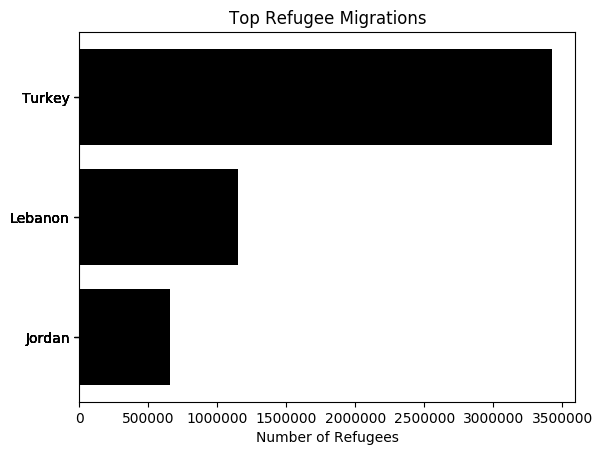

In [49]:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barh.html

plt.rcdefaults()
fig, ax = plt.subplots()

# y_data will be the titles
y_data = []

# x_data is numbe rof weeks
top_refugee = top_refugee[:15]
x_data = top_refugee['Refugees (incl. refugee-like situations)']
y_data = top_refugee['Country']
# for index, row in max_data.iterrows():
#     # combine title with year
#     title_year = row['title'] + ' '+ '('+ row['year']+')'
#     y_data.append(title_year)

# plot data
ax.barh(y_data, x_data, color='k', align='center')

# label data
ax.set_yticks(y_data)
ax.set_yticklabels(y_data)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Refugees')
ax.set_title('Top Refugee Migrations')

plt.show()

In [50]:
top_refugee

,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Turkey,TUR,2017,3424237,163,3424400,38.963745,35.243322
1,Turkey,TUR,2016,2823987,180,2824167,38.963745,35.243322
2,Turkey,TUR,2015,2503549,297,2503846,38.963745,35.243322
3,Turkey,TUR,2014,1557899,250,1558149,38.963745,35.243322
4,Lebanon,LBN,2014,1147494,417,1149903,33.854721,35.862285
5,Lebanon,LBN,2015,1062690,15,1064947,33.854721,35.862285
6,Lebanon,LBN,2016,1005503,10,1007749,33.854721,35.862285
7,Lebanon,LBN,2017,992127,8,994383,33.854721,35.862285
8,Lebanon,LBN,2013,851284,331,851616,33.854721,35.862285
9,Jordan,JOR,2017,653031,0,653031,30.585164,36.238414
